# Plotting With Pandas Exercise
This set of exercises will require you to use Pandas' plotting functionality alongside some matplotlib methods.  

* **All charts use the `billboard_charts.csv` dataset.**  
* **Import that dataset and parse the `date` column as a date.**
* **Use the matplotlib theme `ggplot`**

## Part 1

Create the bar plot seen in the image below.  It visualizes the top 10 artists who have spent the most weeks at number 1 in the dataset.

* Notice the customized title
* The figure is 8x6
* Add in the x-axis label
* The plot uses the ggplot matplotlib theme
* The bars have a black edge with a width of 3.  You'll need to add that in yourself!

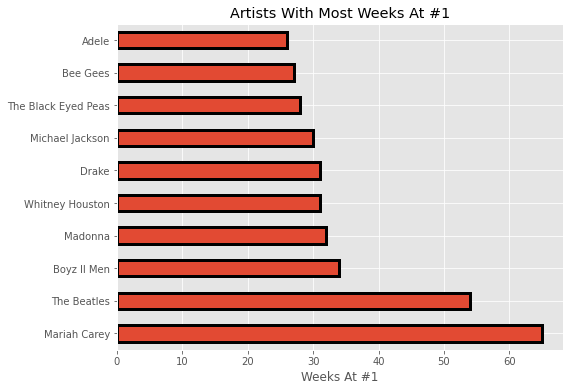

In [ ]:
import pandas as pd
import matplotlib.pyplot as mplt

mplt.style.use("ggplot")
mplt.figure(figsize=(8, 6))

df = pd.read_csv("billboard_charts.csv", parse_dates=["date"])
df[df["rank"] == 1]["artist"].value_counts().head(10).plot(kind="barh", edgecolor="black", linewidth=3)

mplt.title("Artists With Most Weeks At #1")
mplt.xlabel("Weeks At #1")
mplt.show()

## Part 2

Please create the pie chart seen in the image below.  It visualizes the various artists who charted with the song "Please Mr. Postman".  

* Add in the custom title
* Use this list of colors: `colors = ["#6c5ce7","#00cec9", "#74b9ff"]`
* Explode the "Gentle Persuasion" slice by 0.1


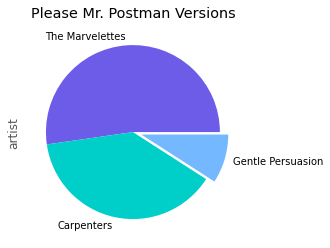

In [ ]:
mplt.style.use("ggplot")

mplt.figure()
df[df["song"] == "Please Mr. Postman"]["artist"].value_counts().plot(kind="pie", colors=["#6c5ce7","#00cec9", "#74b9ff"], explode=(0, 0, 0.1))
mplt.title("Please Mr. Postman Versions")
mplt.ylabel("artist")
mplt.show()

## Part 3
Create the line plot seen in the image below. It visualizes the performance of the song "Blinding Lights"

* The figure is 9x5
* The line color is `#a29bfe`
* To invert the y-axis (so that rank 1 is the highest value), use: `plt.gca().invert_yaxis()`

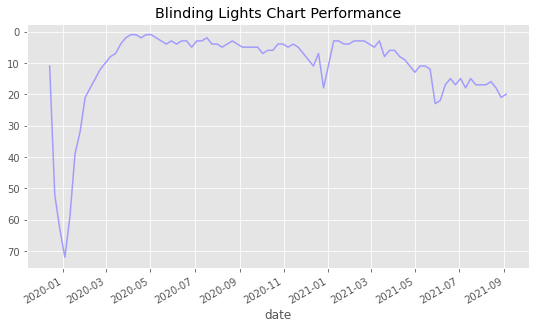

In [ ]:
mplt.style.use("ggplot")

mplt.figure(figsize=(9, 5))
df[df["song"] == "Blinding Lights"].set_index(["date"])["rank"].sort_index().plot(kind="line", color="#a29bfe")
mplt.title("Blinding Lights Chart Performance")
mplt.gca().invert_yaxis()
mplt.xlabel("date")
mplt.show()


## Part 4

Create the line plot seen in the image below.  It shows the chart performance (rank) of the following songs:

* All I Want For Christmas Is You by Mariah Carey
* Rockin' Around The Christmas Tree by Brenda Lee
* Jingle Bell Rock by Bobby Helms

**The date range spans from 2016-12-25 to 2021-01-01**

Notice the customized x-axis tick marks, the legend, the title, and the axis labels! Also the figure is `10x7`

To invert the y-axis, use `plt.gca().invert_yaxis()`


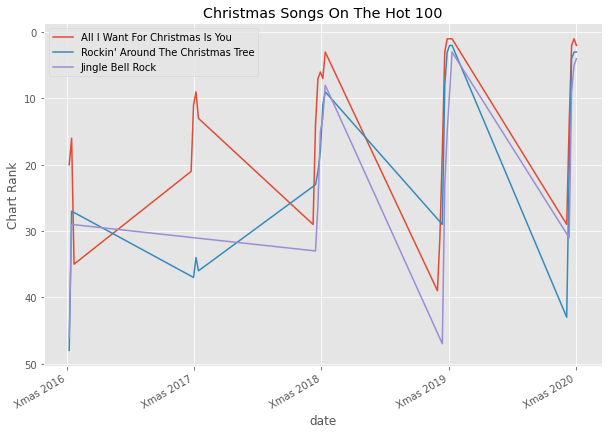

In [ ]:
mplt.style.use("ggplot")

mplt.figure(figsize=(10, 7))
df[(df["song"] == "All I Want For Christmas Is You") & (df["artist"] == "Mariah Carey") & (df["date"].between("2016-12-25", "2021-01-01"))].set_index(["date"])["rank"].sort_index().plot(kind="line", label="All I Want For Christmas Is You")
df[(df["song"] == "Rockin' Around The Christmas Tree") & (df["artist"] == "Brenda Lee") & (df["date"].between("2016-12-25", "2021-01-01"))].set_index(["date"])["rank"].sort_index().plot(kind="line", label="Rockin' Around The Christmas Tree")
df[(df["song"] == "Jingle Bell Rock") & (df["artist"] == "Bobby Helms") & (df["date"].between("2016-12-25", "2021-01-01"))].set_index(["date"])["rank"].sort_index().plot(kind="line", label="Jingle Bell Rock")
mplt.title("Christmas Songs On The Hot 100")
mplt.gca().invert_yaxis()
mplt.xlabel("date")
mplt.ylabel("Chart Rank")
mplt.xticks(ticks=["2016-12-25", "2017-12-25", "2018-12-25", "2019-12-25", "2020-12-25"], labels=["Xmas 2016", "Xmas 2017", "Xmas 2018", "Xmas 2019", "Xmas 2020"])
mplt.legend()
mplt.show()

## Part 5

Create the visualization seen in the image below.  It shows the top 8 songs that spent the most time on the Billboard charts (at any position) for each of the 4 Beatle's solo acts:
* John Lennon
* Wings
* George Harrison
* Ringo Starr

The details:
* 2 rows, 2 columns
* Figure is 14x8
* The main title has a fontsize of 20
* Notice the colors of each plot and its corresponding title!
* Colors are: 
    * red: #fc5c65
    * orange: #fd9644
    * blue: #2bcbba
    * green: #26de81
    

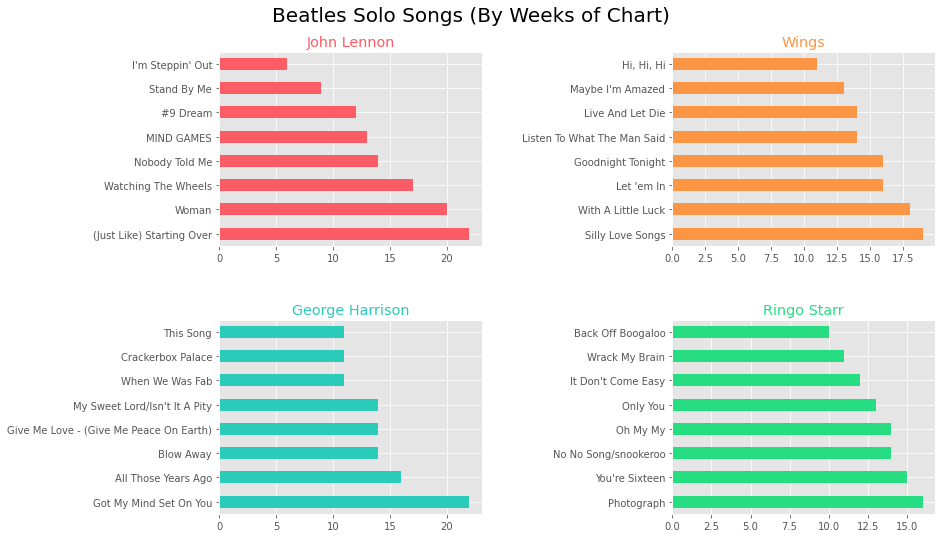

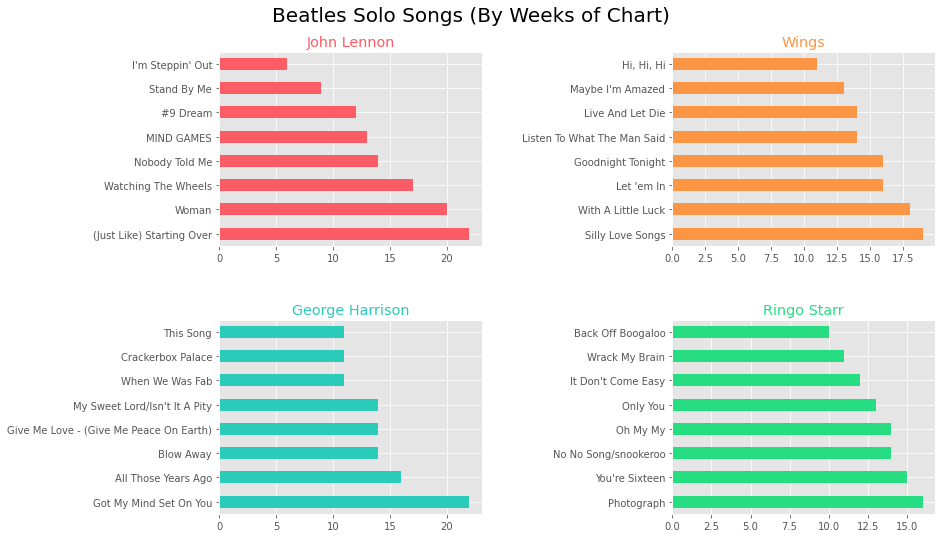

In [ ]:
# pure mplt method

mplt.style.use("ggplot")

mplt.figure(figsize=(14, 8))
mplt.subplot(2, 2, 1)
df[df["artist"] == "John Lennon"]["song"].value_counts().head(8).plot(kind="barh", color="#fc5c65")
mplt.title("John Lennon", color="#fc5c65")

mplt.subplot(2, 2, 2)
df[df["artist"] == "Wings"]["song"].value_counts().head(8).plot(kind="barh", color="#fd9644")
mplt.title("Wings", color="#fd9644")

mplt.subplot(2, 2, 3)
df[df["artist"] == "George Harrison"]["song"].value_counts().head(8).plot(kind="barh", color="#2bcbba")
mplt.title("George Harrison", color="#2bcbba")

mplt.subplot(2, 2, 4)
df[df["artist"] == "Ringo Starr"]["song"].value_counts().head(8).plot(kind="barh", color="#26de81")
mplt.title("Ringo Starr", color="#26de81")

mplt.suptitle("Beatles Solo Songs (By Weeks of Chart)", fontsize=20)
mplt.tight_layout(pad=4)
mplt.show()

# hybrid axes method

mplt.style.use("ggplot")

fig, axes = mplt.subplots(2, 2, figsize=(14, 8))
df[df["artist"] == "John Lennon"]["song"].value_counts().head(8).plot(kind="barh", color="#fc5c65", ax=axes[0][0])
axes[0][0].set_title("John Lennon", color="#fc5c65")

df[df["artist"] == "Wings"]["song"].value_counts().head(8).plot(kind="barh", color="#fd9644", ax=axes[0][1])
axes[0][1].set_title("Wings", color="#fd9644")

df[df["artist"] == "George Harrison"]["song"].value_counts().head(8).plot(kind="barh", color="#2bcbba", ax=axes[1][0])
axes[1][0].set_title("George Harrison", color="#2bcbba")

df[df["artist"] == "Ringo Starr"]["song"].value_counts().head(8).plot(kind="barh", color="#26de81", ax=axes[1][1])
axes[1][1].set_title("Ringo Starr", color="#26de81")

mplt.suptitle("Beatles Solo Songs (By Weeks of Chart)", fontsize=20)
mplt.tight_layout(pad=4)
mplt.show()